# **Digital Image Processing (EE-433) - Lab #12**

***Advance Image Thresholding and Color Image quantization with K-Means clustering***

Name: Muhammad Saad Tariq

Cms: 224921

Class: BSCS-7A

Original Image:


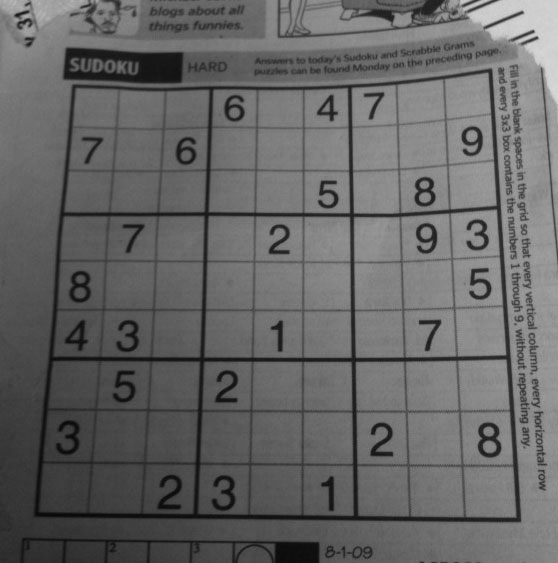


Applying global thresholding at v = 127: 


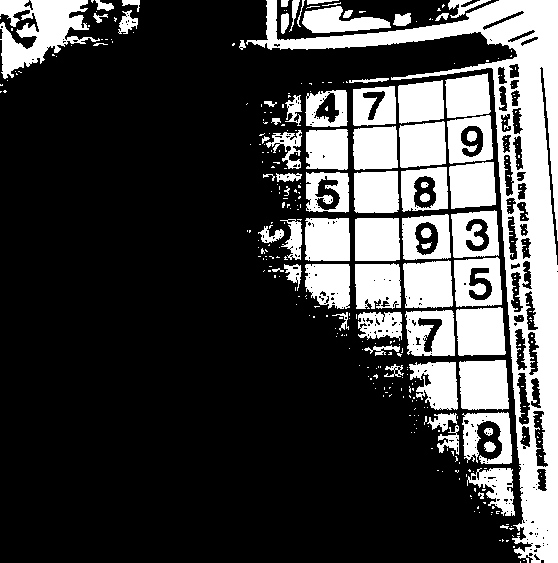


Mean Adaptive Thresholding:


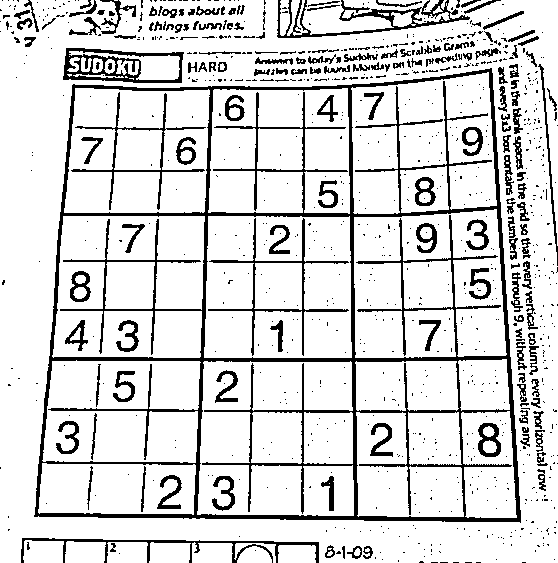


Gaussian Adaptive Thresholding:


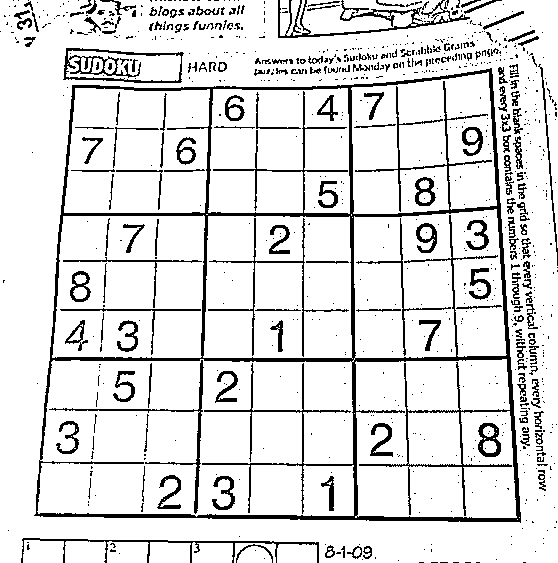

In [3]:
######################### Task 1 #########################
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('sudoku.png', 0)
print('Original Image:')
cv2_imshow(img)
res = np.copy(img)

def global_threshold(image, res, v):
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      if image[i,j] < v:
        res[i,j] = 0
      else:
        res[i,j] = 255
  return res

#applying global thresholding at 127
thresh = 127
C = 5
blockSize = 7
print('\nApplying global thresholding at v = 127: ')
cv2_imshow(global_threshold(img, res, thresh))

res2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,blockSize,C)
res3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,blockSize,C)
print('\nMean Adaptive Thresholding:')
cv2_imshow(res2)
print('\nGaussian Adaptive Thresholding:')
cv2_imshow(res3)

Original Image:


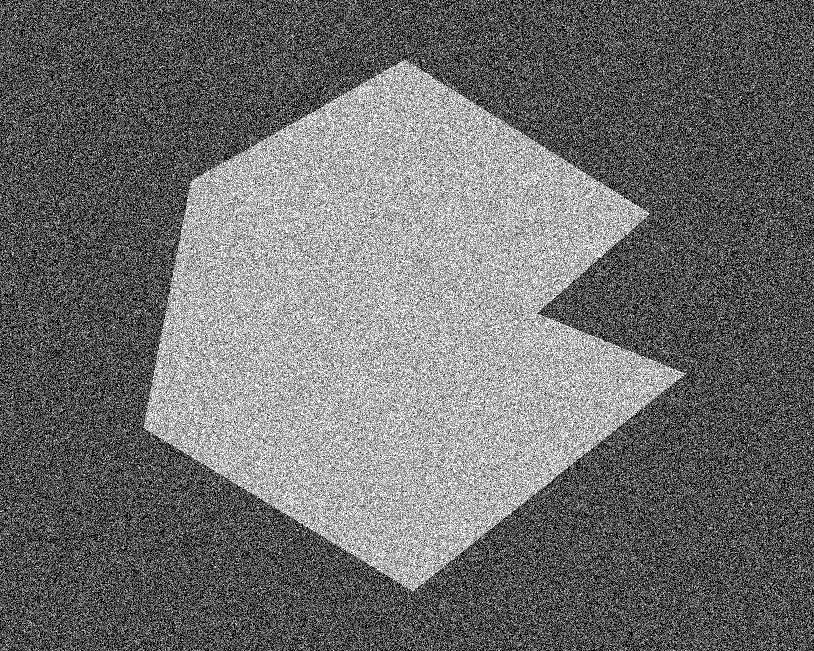

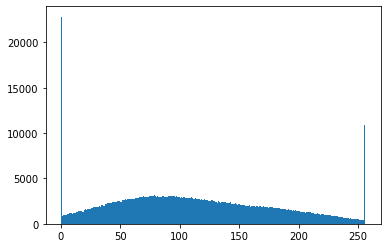


OTSU Global Thresholding without noise removal:


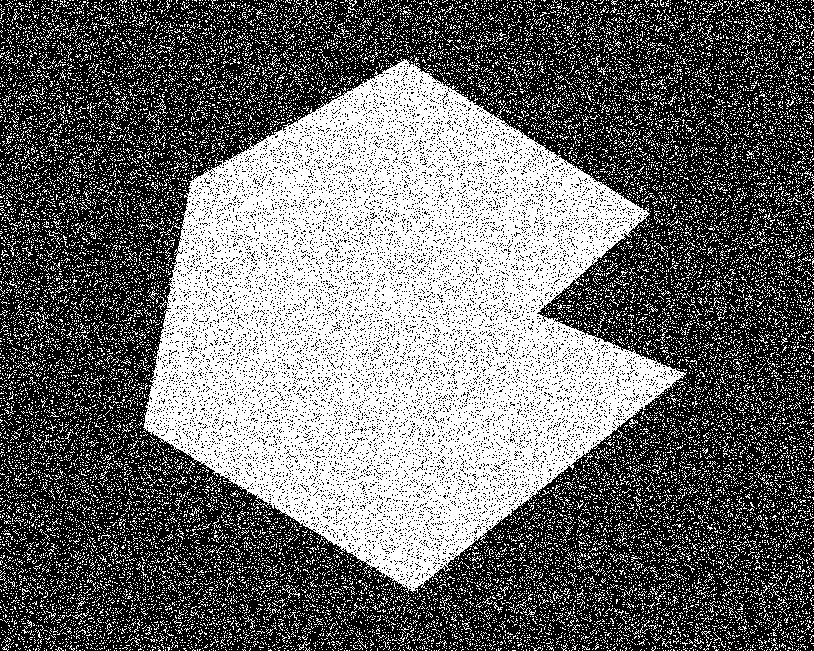


Image histogram after noise removal:


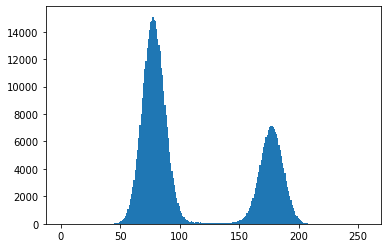


OTSU Global Thresholding after noise removal:


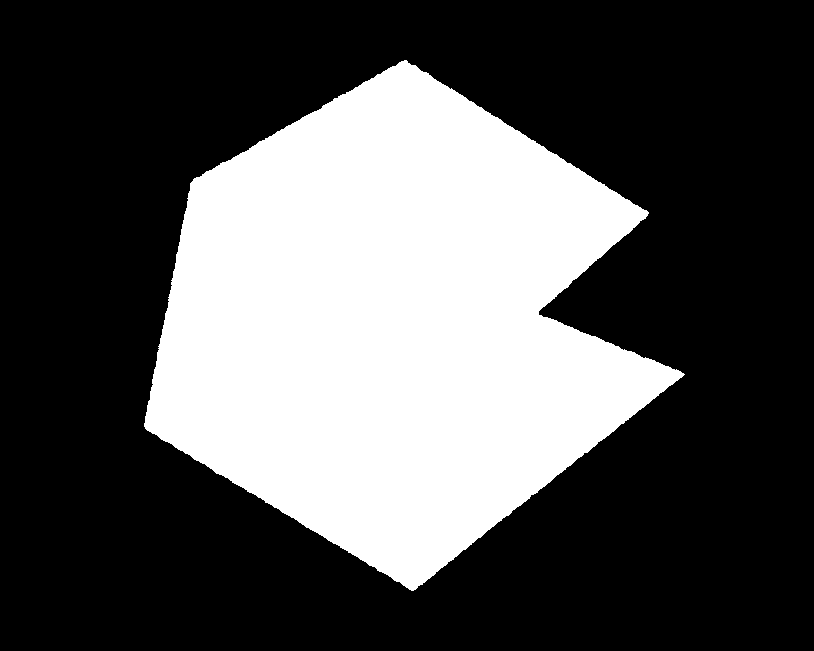

In [4]:
######################### Task 2 #########################
from matplotlib import pyplot as plt

img = cv2.imread('shape.tif', 0)
print('Original Image:')
cv2_imshow(img)

plt.hist(img.ravel(),256,[0,256]); plt.show()

#without noise filtering
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('\nOTSU Global Thresholding without noise removal:')
cv2_imshow(th2)

#with noise filtering
k_size = (5,5)
flt = cv2.GaussianBlur(img,k_size,cv2.BORDER_DEFAULT)
print('\nImage histogram after noise removal:')
plt.hist(flt.ravel(),256,[0,256]); plt.show()
ret3,th3 = cv2.threshold(flt,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('\nOTSU Global Thresholding after noise removal:')
cv2_imshow(th3)

Original Image:


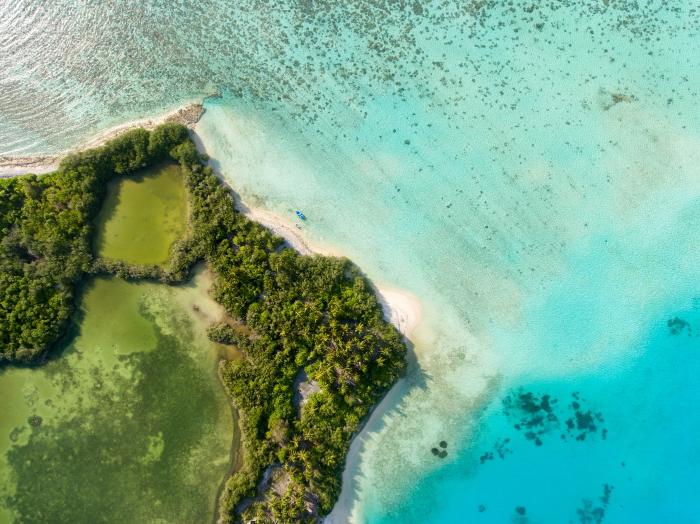


Results after K-Means clustering with k=8:


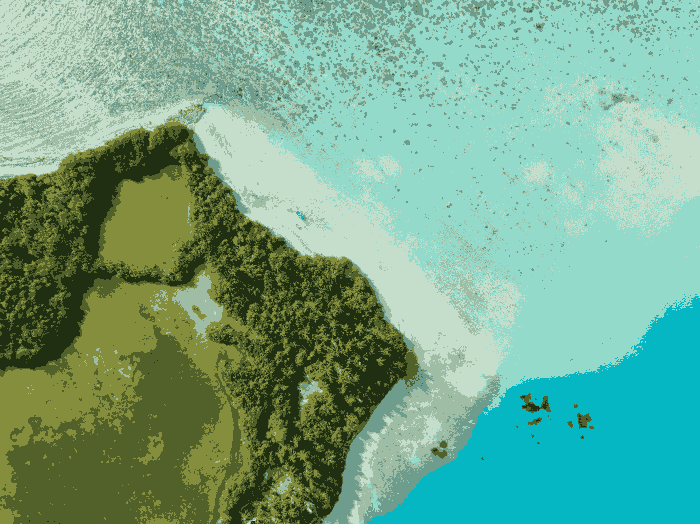

In [6]:
######################### Task 3 #########################
img = cv2.imread('view.jpeg')
scale_percent = 50

#calculate the 50 percent of original dimensions
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
# resize image
img = cv2.resize(img, (width,height))
print('Original Image:')
cv2_imshow(img)

Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
print('\nResults after K-Means clustering with k=8:')
cv2_imshow(res2)